In [4]:
import numpy as np
import pandas as pd
import pickle
#from build_database import flux_obj
from scipy import interpolate
import matplotlib.pyplot as plt
import os
import itertools
import random
import os
import time
import datetime
import gzip
import scipy.io
import matplotlib.gridspec as gridspec


from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
# %matplotlib nbagg
# Autoload changes made in external editor:
%load_ext autoreload
%autoreload 2
# --------------- Latex Plot Beautification --------------------------
fig_width = 7 
fig_height = 4
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 14,
          'font.size': 14,
          'legend.fontsize': 14,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------

In [5]:
from methods.graf_iono_absorp import graf_iono_model
from methods.ionoAbsorp import ionoAbsorp as helliwell

In [6]:
# Helliwell daytime
def helliwell_day(lat_vec, freq):
    lats_20k=    [2.011215e+01, 2.493458e+01, 2.257944e+01, 2.964486e+01, 3.446729e+01, 3.828037e+01, 4.310280e+01, 4.871028e+01, 5.431776e+01, 5.880374e+01, 6.250467e+01, 6.631776e+01, 6.957009e+01, 7.416822e+01, 7.192523e+01, 7.697196e+01, 7.988785e+01, 8.302804e+01, 8.504673e+01, 2.145794e+01, 2.728972e+01, 3.211215e+01]
    db20kHzLog = np.log10(np.array([9.397163e+01, 6.773050e+01, 7.978723e+01, 5.283688e+01, 4.397163e+01, 3.936170e+01, 3.546099e+01, 3.333333e+01, 3.014184e+01, 2.836879e+01, 2.624113e+01, 2.375887e+01, 2.198582e+01, 1.950355e+01, 2.056738e+01, 1.773050e+01, 1.560284e+01, 1.524823e+01, 1.524823e+01, 8.687943e+01, 5.992908e+01, 4.787234e+01]))
    
    lats_2k=     [1.549195e+01, 1.710197e+01, 1.849732e+01, 1.989267e+01, 2.182469e+01, 2.397138e+01, 2.504472e+01, 2.708408e+01, 2.966011e+01, 3.352415e+01, 3.695886e+01, 3.996422e+01, 4.490161e+01, 4.844365e+01, 5.166369e+01, 5.509839e+01, 5.906977e+01, 6.261181e+01, 6.583184e+01, 6.894454e+01, 7.173524e+01, 7.484794e+01, 7.828265e+01, 8.085868e+01, 8.504472e+01];
    db2kHzLog = np.log10(np.array([4.983498e+01, 4.339934e+01, 3.877888e+01, 3.333333e+01, 2.970297e+01, 2.640264e+01, 2.425743e+01, 2.227723e+01, 1.980198e+01, 1.683168e+01, 1.518152e+01, 1.419142e+01, 1.303630e+01, 1.237624e+01, 1.171617e+01, 1.105611e+01, 1.023102e+01, 9.405941e+00, 8.910891e+00, 8.415842e+00, 7.590759e+00, 6.765677e+00, 6.270627e+00, 6.105611e+00, 5.940594e+00]));
    
    db2i_interp  = interpolate.interp1d(lats_2k,   db2kHzLog, fill_value='extrapolate')
    db20i_interp = interpolate.interp1d(lats_20k, db20kHzLog, fill_value='extrapolate')    
                                  
    db20iLog = db20i_interp(np.abs(lat_vec))
    db2iLog  = db2i_interp(np.abs(lat_vec))
    m = (db20iLog - db2iLog)
    c = (db2iLog + db20iLog)/2 - m*0.8010
    return np.power(10, m*np.log10(freq*1e-3) + c)                                  

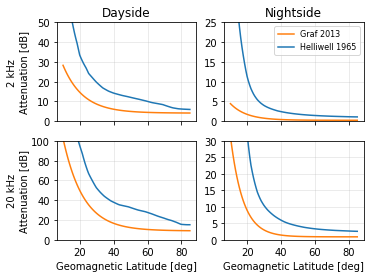

In [12]:

lats = np.linspace(10,85, 100)

# Graf curves
graf_2k_nite = graf_iono_model(lats, 2e3, MLT=0)
graf_20k_nite = graf_iono_model(lats, 20e3, MLT=0)

graf_2k_day = graf_iono_model(lats, 2e3, MLT=12)
graf_20k_day = graf_iono_model(lats, 20e3, MLT=12)

heli_2k_nite = helliwell(lats, 2e3)
heli_20k_nite = helliwell(lats, 20e3)

heli_2k_day = helliwell_day(lats, 2e3)
heli_20k_day = helliwell_day(lats, 20e3)

cm0 = plt.cm.get_cmap('Vega10')(1)
cm1 = plt.cm.get_cmap('Vega10')(0)
# --------------- Latex Plot Beautification --------------------------
fig_width = 4.5#4 
fig_height = 3
fig_size =  [fig_width+1,fig_height+1]
params = {'font.family': 'Sans Serif',
          'backend': 'ps',
          'axes.labelsize': 10,
          'font.size': 10,
          'legend.fontsize': 8,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------

fig, ax = plt.subplots(2,2)

ax[0,0].plot(lats, graf_2k_day,  color=cm0,  label='Graf 2013')
ax[0,1].plot(lats, graf_2k_nite, color=cm0, label='Graf 2013')
ax[1,0].plot(lats, graf_20k_day, color=cm0, label='Graf 2013')
ax[1,1].plot(lats, graf_20k_nite,color=cm0, label='Graf 2013')

ax[0,0].plot(lats, heli_2k_day,  color=cm1  ,label='Helliwell 1965')
ax[0,1].plot(lats, heli_2k_nite, color=cm1 ,label='Helliwell 1965')
ax[1,0].plot(lats, heli_20k_day, color=cm1,label='Helliwell 1965')
ax[1,1].plot(lats, heli_20k_nite,color=cm1,label='Helliwell 1965')

ax[0,0].set_ylim([0,50])
ax[0,1].set_ylim([0,20])
ax[1,0].set_ylim([0,100])
ax[1,1].set_ylim([0,30])

ax[0,0].set_yticks([0, 10, 20, 30, 40, 50])
ax[0,1].set_yticks([0, 5, 10, 15, 20, 25])
ax[1,0].set_yticks([0, 20, 40, 60, 80, 100])
ax[1,1].set_yticks([0, 5, 10, 15, 20, 25, 30])


ax[0,0].set_xticks([20, 40, 60, 80])
ax[0,1].set_xticks([20, 40, 60, 80])
ax[1,0].set_xticks([20, 40, 60, 80])
ax[1,1].set_xticks([20, 40, 60, 80])

ax[0,0].set_xticklabels([])
ax[0,1].set_xticklabels([])
for a in ax.ravel():
    a.grid('on', which='both', alpha=0.3)
    
ax[0,0].set_title('Dayside')
ax[0,1].set_title('Nightside')
ax[0,0].set_ylabel('2 kHz\nAttenuation [dB]')
ax[1,0].set_ylabel('20 kHz\nAttenuation [dB]')
ax[1,0].set_xlabel('Geomagnetic Latitude [deg]')
ax[1,1].set_xlabel('Geomagnetic Latitude [deg]')

ax[0,1].legend()

ax[0,0].get_yaxis().set_label_coords(-0.2,0.5)
ax[1,0].get_yaxis().set_label_coords(-0.2,0.5)

# fig.tight_layout()

fig.savefig('iono_absorp_curves.pdf')
# fig.text(0.025,0.6, 'Attenuation [dB]', rotation=90)

In [3]:
plt.cm.get_cmap()

NameError: name 'plt' is not defined